# Train Data

## Importing Necessary Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("C:/Users/KRIZAL/Desktop/DSA/Flask_Krisselle/iris_flask.xls")

In [3]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data.shape

(150, 5)

In [5]:
data.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

## Exploratory Data Analysis 

### Frequency Graph 

array([[<AxesSubplot:title={'center':'SL'}>,
        <AxesSubplot:title={'center':'SW'}>],
       [<AxesSubplot:title={'center':'PL'}>,
        <AxesSubplot:title={'center':'PW'}>]], dtype=object)

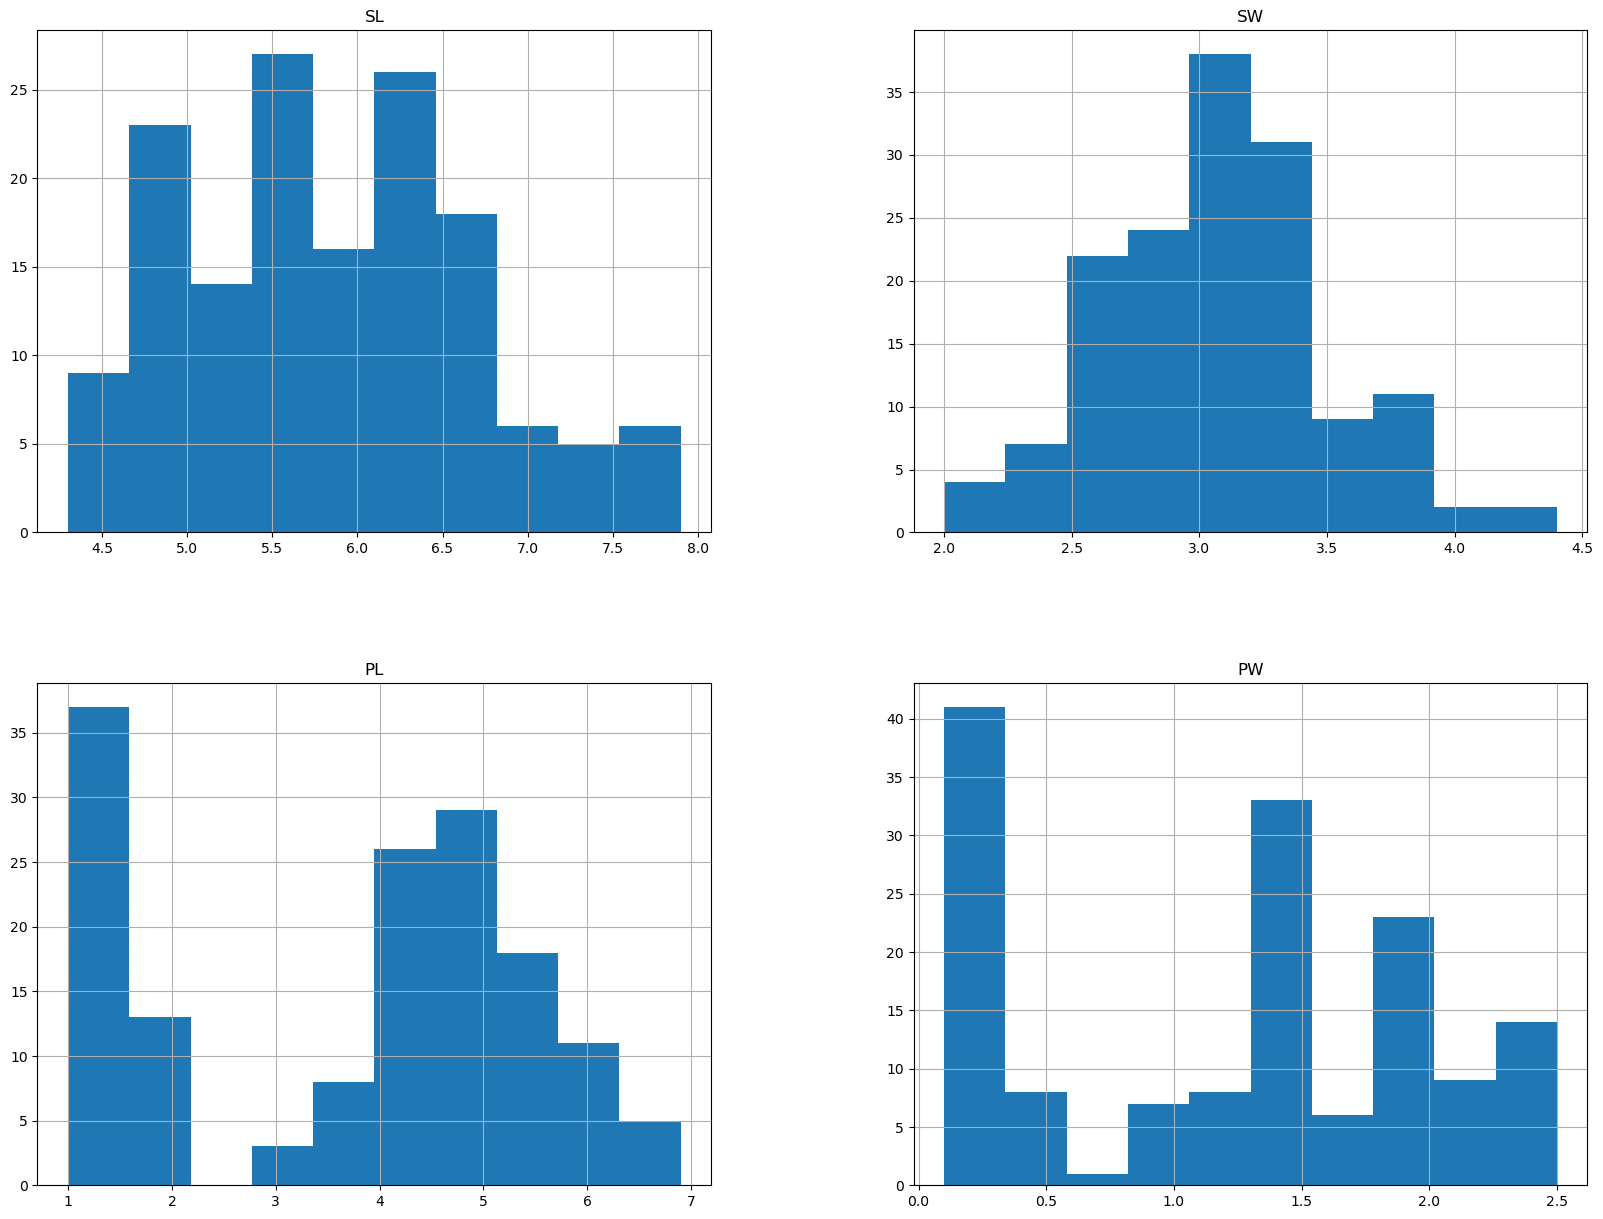

In [7]:
freq_graph = data.select_dtypes(include = ["float"])
freq_graph.hist(figsize = (20, 15))

## Preprocessing

In [8]:
data.nunique()

SL                35
SW                23
PL                43
PW                22
Classification     3
dtype: int64

In [9]:
#Finding null values

data.isna().sum() 

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

**There is no null values present in the data.**

### Checking Skewness 

In [10]:
data.mean()

C:\Users\KRIZAL\AppData\Local\Temp\ipykernel_22768\531903386.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean()


SL    5.843333
SW    3.054000
PL    3.758667
PW    1.198667
dtype: float64

In [11]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [12]:
for i in ['SL', 'SW', 'PL', 'PW']:
    skew_data = data[i].skew()
    print(skew_data)

0.3149109566369728
0.3340526621720866
-0.27446425247378287
-0.10499656214412734


**Plotting Skewed data**

C:\Users\KRIZAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


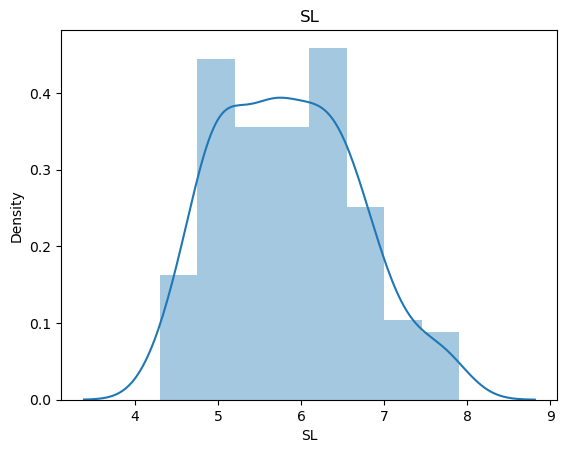

C:\Users\KRIZAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


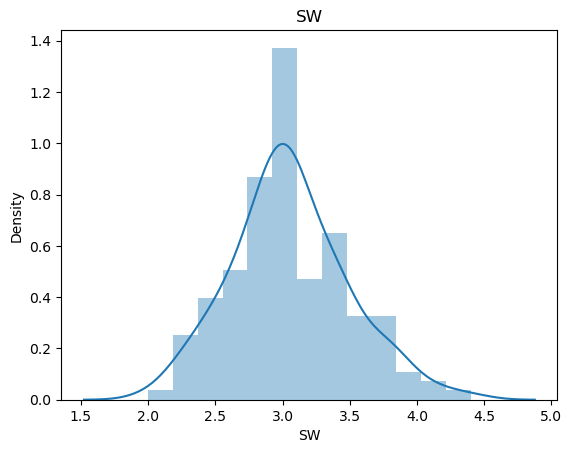

C:\Users\KRIZAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


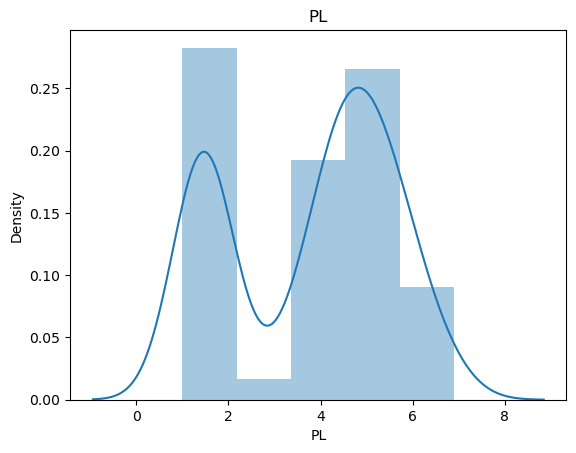

C:\Users\KRIZAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


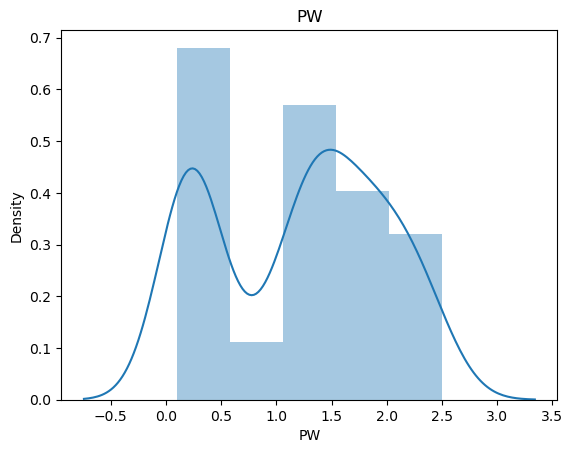

In [13]:
for i in ['SL', 'SW', 'PL', 'PW']:
    sns.distplot(data[i])
    plt.title(i)
    plt.show()

**The skewness of the numerical columns are in a moderate range.**



## Outlier Detection

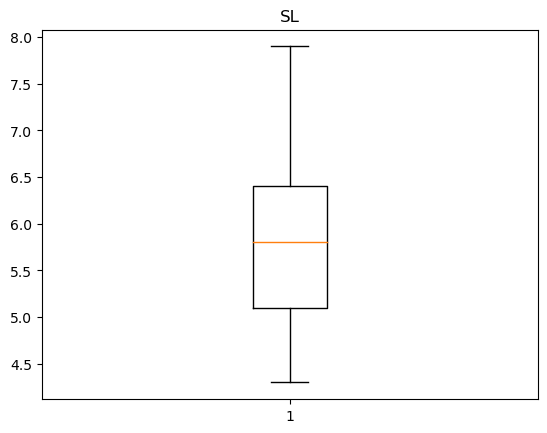

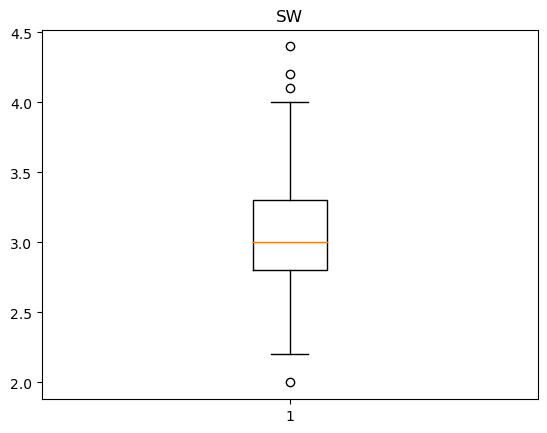

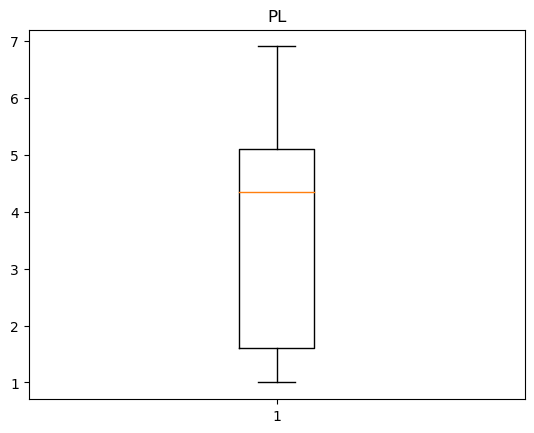

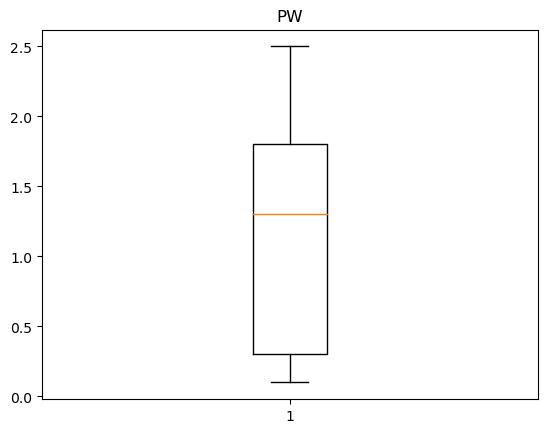

In [14]:
for i in ['SL', 'SW', 'PL', 'PW']:
    plt.boxplot(data[i])
    plt.title(i)
    plt.show()

### Finding Outliers

In [15]:

    # Inter Quartile Range
    
    Q1 = np.percentile(data["SW"], 25,interpolation="midpoint")
    Q2 = np.percentile(data["SW"], 50,interpolation="midpoint")
    Q3 = np.percentile(data["SW"], 75,interpolation="midpoint")
    print("Interquartile range of SW: \n")
    print("Q1: {}".format(Q1))
    print("Q2: {}".format(Q2))
    print("Q3: {}\n".format(Q3))
    
    IQR = Q3-Q1
    print("IQR:{}\n".format(IQR))
    
    # Limit identification
    
    low_limit = Q1-1.5*IQR
    up_limit  = Q3+1.5*IQR
    print("Lower limit : {}".format(low_limit))
    print("Upper limit : {}\n".format(up_limit))
    
    
    # Finding outlier
    
    outlier= []
    for x in data["SW"]:
        if ((x>up_limit) or (x<low_limit)):
            outlier.append(x)
    print("Outlier: {}\n".format(outlier))
    
    
    # Finding index colum with outlier

    ind_out  = data["SW"]>up_limit
    ind_data = data["SW"].loc[ind_out].index
    print("Index : {}\n".format(ind_data))
    



Interquartile range of SW: 

Q1: 2.8
Q2: 3.0
Q3: 3.3

IQR:0.5

Lower limit : 2.05
Upper limit : 4.05

Outlier: [4.4, 4.1, 4.2, 2.0]

Index : Int64Index([15, 32, 33], dtype='int64')



In [16]:
data.drop([15, 32,33], inplace =  True)
data.head(20)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## Correlation Matrix 

,SL,SW,PL,PW
SL,1.000000,-0.092999,0.877348,0.821412
SW,-0.092999,1.000000,-0.384960,-0.317098
PL,0.877348,-0.384960,1.000000,0.961726
PW,0.821412,-0.317098,0.961726,1.000000


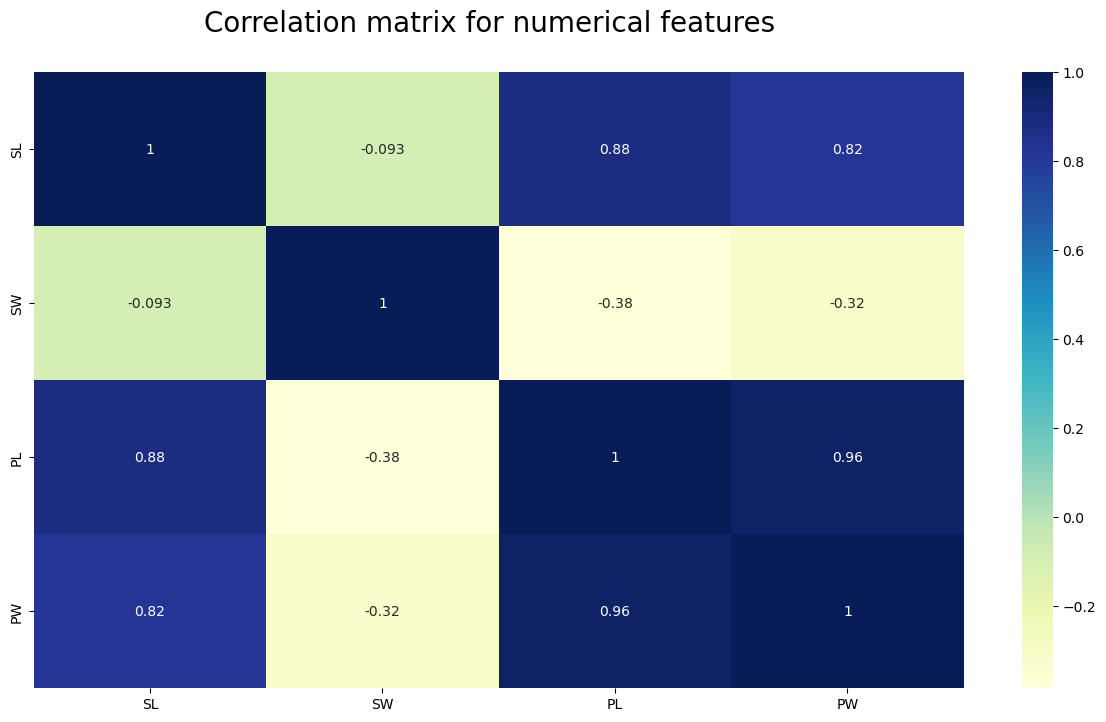

In [17]:
corrmatrix = data.corr()
plt.subplots(figsize =(15,8))
plt.title("Correlation matrix for numerical features  \n", size = 20)
sns.heatmap(corrmatrix, annot=True, cmap="YlGnBu")
corrmatrix

## Label Encoding 

In [18]:
data["Classification"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [19]:
#from sklearn import preprocessing

#from sklearn.preprocessing import LabelEncoder

#le = LabelEncoder()

#data["Classification"] = le.fit_transform(data["Classification"])

In [20]:
data.head(10)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## Splitting target and independent features 

In [21]:
from sklearn.model_selection import train_test_split

x = data.drop('Classification',axis=1)
y = data['Classification']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

## Classification Models

###  1) Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score


log_reg    = LogisticRegression()
model_log  = log_reg.fit(x_train ,y_train)
y_pred_log = model_log.predict(x_test)


# Confusion matrix and accuracy score

print(confusion_matrix(y_test,y_pred_log))  # 54 misclassifications
print(accuracy_score(y_test, y_pred_log))

[[14  0  0]
 [ 0  9  1]
 [ 0  0 13]]
0.972972972972973


### 2) kNN Model

[0.9459459459459459, 0.972972972972973, 0.972972972972973, 0.9459459459459459, 0.9459459459459459, 0.972972972972973, 0.972972972972973, 0.972972972972973, 1.0, 0.972972972972973, 0.972972972972973, 0.972972972972973]


C:\Users\KRIZAL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\KRIZAL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

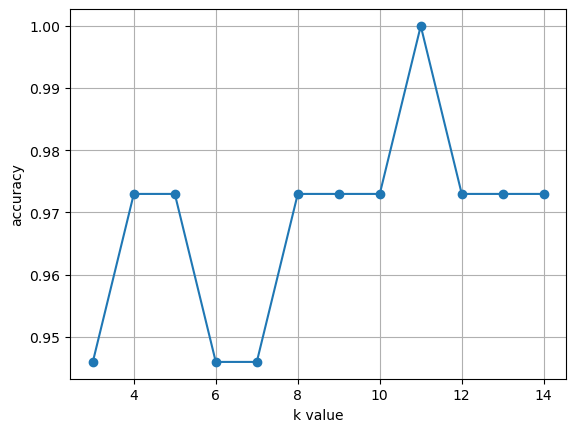

In [23]:
from sklearn.neighbors import KNeighborsClassifier
metric_k  = []
neighbors = np.arange(3, 15)


for k in neighbors:
    knn       =  KNeighborsClassifier(n_neighbors = k)
    knn_model =  knn.fit(x_train,y_train)
    knn_pred  =  knn_model.predict(x_test)
    knn_acc   =  accuracy_score(y_test,knn_pred)
    metric_k.append(knn_acc)
    
print(metric_k)   
    
    
#plotting graph

plt.plot(neighbors, metric_k, 'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

**On Checking highest k value = 11**

In [24]:
knn_11       =  KNeighborsClassifier(n_neighbors = 10)
knn_model_11 =  knn_11.fit(x_train,y_train)
knn_pred_11  =  knn_model_11.predict(x_test)
knn_pred_11




# Confusion matrix and accuracy score

print(confusion_matrix(y_test, knn_pred_11))
print(accuracy_score(y_test, knn_pred_11))



[[14  0  0]
 [ 0 10  0]
 [ 0  1 12]]
0.972972972972973


C:\Users\KRIZAL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [25]:
# Confusion matrix and accuracy score

print(confusion_matrix(y_test, knn_pred))  # 50 misclassifications
print(accuracy_score(y_test, knn_pred))

[[14  0  0]
 [ 0 10  0]
 [ 0  1 12]]
0.972972972972973


### 3) Support Vector Machine (SVM) 

In [26]:
from sklearn.svm import SVC

**3.1  SVM = rbf**

In [27]:
svm_rbf       = SVC(kernel = "rbf")
svm_model_rbf = svm_rbf.fit(x_train, y_train)
y_pred_rbf    = svm_model_rbf.predict(x_test)



# Confusion matrix and accuracy score

print(confusion_matrix(y_test, y_pred_rbf))  # 55 misclassifications
print(accuracy_score(y_test, y_pred_rbf))

[[14  0  0]
 [ 0 10  0]
 [ 0  0 13]]
1.0


**3.2  SVM = linear**

In [28]:
svm_linear       = SVC(kernel = "linear")
svm_model_linear = svm_linear.fit(x_train, y_train)
y_pred_linear    = svm_model_linear.predict(x_test)



# Confusion matrix and accuracy score

print(confusion_matrix(y_test, y_pred_linear))
print(accuracy_score(y_test, y_pred_linear))

[[14  0  0]
 [ 0  8  2]
 [ 0  0 13]]
0.9459459459459459


**3.3    SVM = poly**

In [29]:
svm_poly       = SVC(kernel = "poly")
svm_model_poly = svm_poly.fit(x_train, y_train)
y_pred_poly    = svm_model_poly.predict(x_test)



# Confusion matrix and accuracy score

print(confusion_matrix(y_test, y_pred_poly))  # 55 misclassifications
print(accuracy_score(y_test, y_pred_poly))

[[14  0  0]
 [ 0  8  2]
 [ 0  0 13]]
0.9459459459459459


### 4) Desicion Tree 

In [30]:
from sklearn.tree import DecisionTreeClassifier 

dt         = DecisionTreeClassifier(random_state = 42)
dt_model   = dt.fit(x_train, y_train)
y_pred_dt  = dt_model.predict(x_test)



# Confusion matrix and accuracy score

print(confusion_matrix(y_test, y_pred_dt))   # 46 misclassifications
print(accuracy_score(y_test, y_pred_dt))

[[14  0  0]
 [ 0  9  1]
 [ 0  0 13]]
0.972972972972973


### 5) Random Forest 

In [31]:
from sklearn.ensemble import RandomForestClassifier 

rf       = RandomForestClassifier(random_state = 42)
rf_model = rf.fit(x_train, y_train)
y_pred_rf  = rf_model.predict(x_test)



# Confusion matrix and accuracy score

print(confusion_matrix(y_test, y_pred_rf))  # 35 misclassifications
print(accuracy_score(y_test, y_pred_rf))

[[14  0  0]
 [ 0  9  1]
 [ 0  0 13]]
0.972972972972973


### 6) Naive Bayes 

In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score


gnb        = GaussianNB()
model_gnb  = gnb.fit(x_train ,y_train)
y_pred_gnb = model_gnb.predict(x_test)


# Confusion matrix and accuracy score

print(confusion_matrix(y_test,y_pred_gnb))   # 60 misclassifications
print(accuracy_score(y_test, y_pred_gnb))

[[14  0  0]
 [ 0  9  1]
 [ 0  0 13]]
0.972972972972973


### 7)  Gradient Boosting Classifier

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

gbk        = GradientBoostingClassifier()
model_gbk  = gbk.fit(x_train ,y_train)
y_pred_gbk = model_gbk.predict(x_test)


# Confusion matrix and accuracy score

print(confusion_matrix(y_test,y_pred_gbk))  # 40 misclassifications
print(accuracy_score(y_test, y_pred_gbk))


[[14  0  0]
 [ 0  9  1]
 [ 0  0 13]]
0.972972972972973


**Based on train data, on comparing the accuracy of each model:**


Logistic regression  = 97.29%


kNN Model = 97.29%


**SVM kernel rbf     = 100%**


SVM kernal linear = 94.59%


SVM kernel poly    = 94.59%


Decision tree      = 97.29%


Random Forest = 97.29%


Naive Bayes = 97.29%


Gradient Boosting Classifier = 97.29%


**From the above observation, SVM kernal rbf has the highest accuracy thus it can be considered as the best model to classify the data.**
 

## Prediction Using Random Classifier with Test Data  

In [34]:
y_pred_test  = svm_rbf.predict(x)
y_pred_test

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',


In [35]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Creating a csv file with Predicted values

In [43]:
# Create New Data with Loan_ID and predicted Loan_Status 

new_data = {"SL": x["SL"], "SW": x["SW"], "PL": x["PL"], 
            "PW": x["PW"],"Classification": y_pred_test}



# Creating Dataframe

df = pd.DataFrame(new_data, columns=["SL", "SW", "PL", "PW", "Classification"])


# Replacing the values of Loan Status with predicted values 

#df["Loan_Status"].replace(0,"N",inplace=True)
#df["Loan_Status"].replace(1,"Y",inplace=True)


# Converting Dataframe to csv file
 
df.to_csv("Sample_Submission_Krisselle_iris.csv", index = False)

In [44]:
nd = pd.read_csv("C:/Users/KRIZAL/Sample_Submission_Krisselle_iris.csv")

In [49]:
nd.shape

(147, 5)